In [2]:
import Plots as plt
import LinearAlgebra as linalg
import Polynomials as poly

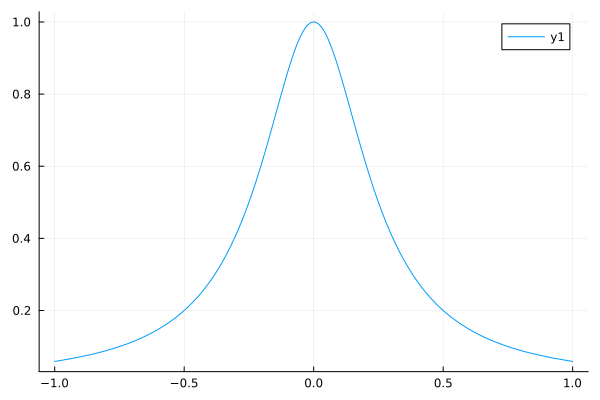

In [3]:
foo = t -> 1/(1 + 16*t^2);
plt.plot(foo, -1, 1)

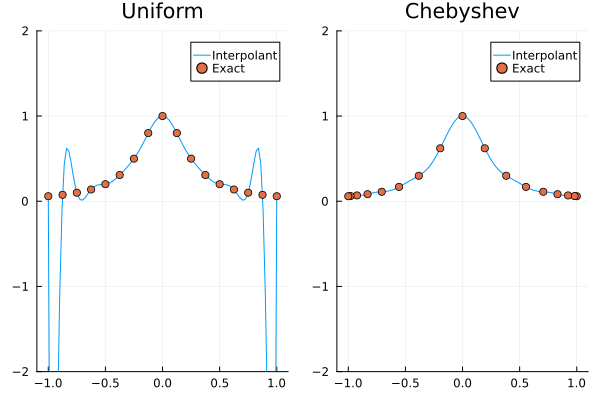

In [4]:
N = 16;
fig = plt.plot(layout = (1,2), xlims = (-1.1,1.1), ylims = (-2,2));
for i in 1:2
    i == 1 ? xarr = -1 .+ (2/N).*(0:N) : xarr = cos.((pi/N) .* (0:N));
    i == 1 ? s = "Uniform" : s = "Chebyshev";
    poly_foo = poly.fit(xarr, foo.(xarr))
    plt.plot!(fig[i], poly_foo, xarr[1], xarr[N+1], title = s, label = "Interpolant");
    plt.scatter!(fig[i], xarr, foo.(xarr), label = "Exact")
end
display(fig)

In [23]:
include("cheb.jl")

cheb (generic function with 1 method)

In [44]:
function calc_eq(farr)
    D2farr = D2mat * farr;
    D1farr = Dmat  * farr;

    eqvec = zeros(N);
    for ii in 1:N
        fzz = D2farr[ii];
        fz  = D1farr[ii];
        f   = farr[ii];
        z   = grid[ii];
        eqvec[ii] = z^2 * fzz + 8 * fz * z + (2 * z^2 /3 + 12) * f - 2 / 9;
    end
    return(eqvec);
end;

In [45]:
function calc_Jac(farr)

    eps = 1e-8;
    Jac = zeros(N,N); 

    for ii in 1:N
        tmpf = copy(farr);
        tmpf[ii] += eps;
        EqP = calc_eq(tmpf);

        tmpf = copy(farr);
        tmpf[ii] -= eps;
        EqM = calc_eq(tmpf);

        for kk in 1:N
            Jac[kk,ii] = (EqP[kk] - EqM[kk])/(2*eps);
        end
    end
    return(Jac)
end;

In [49]:
N = 200;
zmin = 10e-5
Dmat, grid = cheb(zmin,1,N);
D2mat = Dmat*Dmat;

Beginning computation. Error = 0.09148903864480352
After iteration n.1 , error = 2.9413535651244495e-5 .
After iteration n.2 , error = 8.004228977043446e-10 .
Convergence.


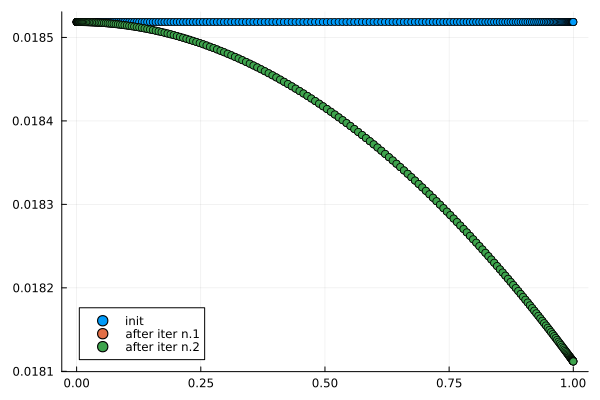

In [50]:
init_Sarr = ones(N)/54;

initeq = calc_eq(init_Sarr);
err = linalg.norm(initeq);
ErrorTolerance = 1e-8;
iter = 1;
IterMax = 5;
Sarr = init_Sarr; eqvec = initeq;
println("Beginning computation. Error = ",err);

fig = plt.scatter(grid, init_Sarr, label = "init");

while iter <= IterMax
    Jac = calc_Jac(Sarr);
    step = Jac \ eqvec;
    Sarr = Sarr - step;
    eqvec = calc_eq(Sarr);
    err = linalg.norm(eqvec);

    println("After iteration n.", iter, " , error = ",err, " .");
    plt.scatter!(fig, grid, Sarr, label = string("after iter n.", iter));

    if err < ErrorTolerance
        println("Convergence.")
        break
    end
    iter += 1;

end

display(fig)


In [40]:
include("cheb.jl")

cheb (generic function with 1 method)

In [51]:
testfoo = x -> x^2 + 1/(16*x^2+3);
testder = x -> 2 + 96*(-1+16*x^2)/(3+16*x^2)^3;

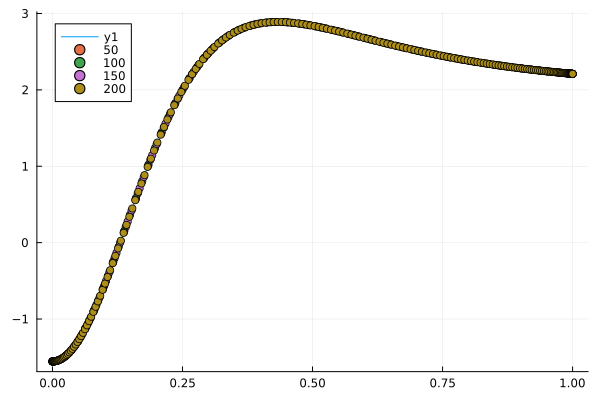

In [52]:
fig = plt.plot(testder, 0,1);
for N in 50:50:200
    Dmat, grid = cheb(0,1,N);
    D2mat = Dmat*Dmat;
    fooarr = testfoo.(grid);
    numder = D2mat*fooarr;
    plt.scatter!(grid, numder,label = string(N))
end
display(fig)

In [35]:
display(50:50:200)

50:50:200